In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp


In [9]:
df = pd.read_csv("marketing_campaign.csv")
print(df.head(10))

   campaign_id campaign_name  investment  revenue_generated
0            1    Campaign 1    49487.73         84129.1410
1            2    Campaign 2    31088.53         70881.8484
2            3    Campaign 3    22106.35         42444.1920
3            4    Campaign 4    29792.67         87888.3765
4            5    Campaign 5    38540.05         92110.7195
5            6    Campaign 6    35115.48         51970.9104
6            7    Campaign 7    16921.38         32319.8358
7            8    Campaign 8     7985.07         13973.8725
8            9    Campaign 9    21653.79         56732.9298
9           10   Campaign 10    33337.29         92344.2933


In [10]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Data types:\n", df.dtypes)

print("Missing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

print(df.describe())


Shape: (100, 4)
Columns: ['campaign_id', 'campaign_name', 'investment', 'revenue_generated']
Data types:
 campaign_id            int64
campaign_name         object
investment           float64
revenue_generated    float64
dtype: object
Missing values:
 campaign_id          0
campaign_name        0
investment           0
revenue_generated    0
dtype: int64
Duplicates: 0
       campaign_id    investment  revenue_generated
count   100.000000    100.000000         100.000000
mean     50.500000  29740.635100       62194.218745
std      29.011492  13038.196412       32310.019254
min       1.000000   5018.090000        7089.051900
25%      25.750000  19837.305000       36356.478600
50%      50.500000  31139.585000       60994.763800
75%      75.250000  41243.275000       84974.451150
max     100.000000  49487.730000      136821.472300


# EDA

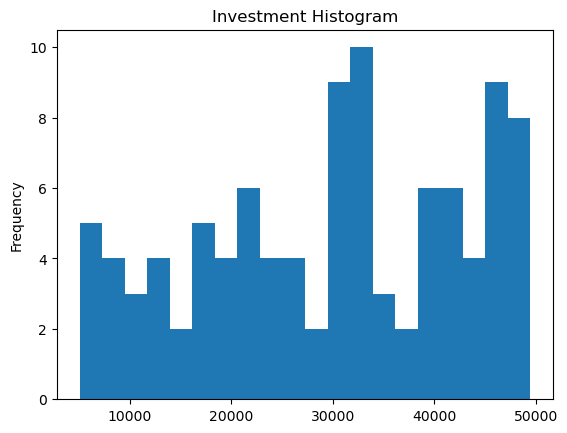

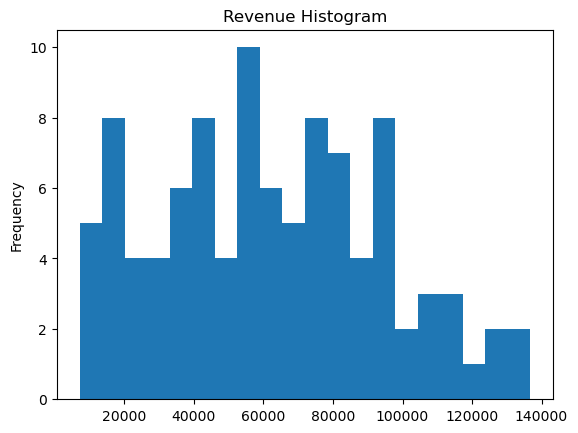

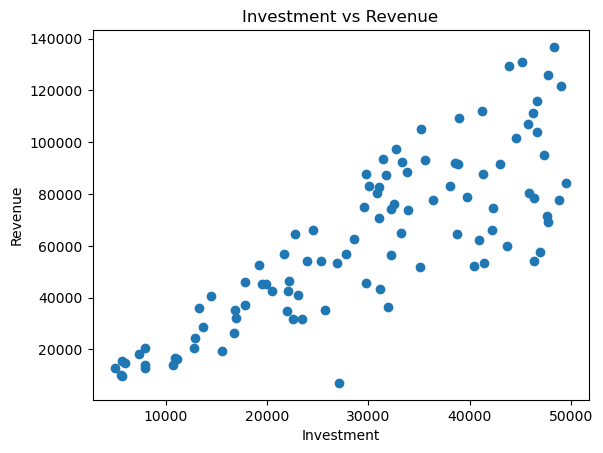

    campaign_id campaign_name  revenue_generated
40           41   Campaign 41        136821.4723
70           71   Campaign 71        131021.9710
93           94   Campaign 94        129509.6315
29           30   Campaign 30        126080.9352
80           81   Campaign 81        121895.8584
18           19   Campaign 19        116074.7364
14           15   Campaign 15        112101.9712
31           32   Campaign 32        111347.5189
91           92   Campaign 92        109530.1470
58           59   Campaign 59        107037.8010
    campaign_id campaign_name  investment
79           80   Campaign 80     5018.09
25           26   Campaign 26     5627.82
48           49   Campaign 49     5675.85
65           66   Campaign 66     5699.00
45           46   Campaign 46     5968.62
75           76   Campaign 76     7425.92
20           21   Campaign 21     7968.25
7             8    Campaign 8     7985.07
12           13   Campaign 13     7994.14
42           43   Campaign 43    10684.83

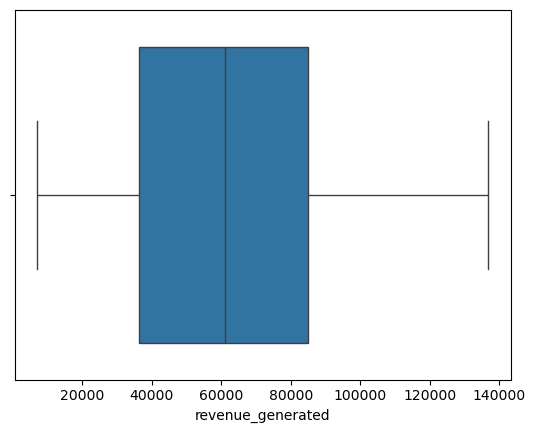

In [11]:

df['investment'].plot(kind='hist', bins=20, title='Investment Histogram')
plt.show()
df['revenue_generated'].plot(kind='hist', bins=20, title='Revenue Histogram')
plt.show()

plt.scatter(df['investment'], df['revenue_generated'])
plt.xlabel("Investment")
plt.ylabel("Revenue")
plt.title("Investment vs Revenue")
plt.show()


print(df.nlargest(10, 'revenue_generated')[['campaign_id','campaign_name','revenue_generated']])
print(df.nsmallest(10, 'investment')[['campaign_id','campaign_name','investment']])
sns.boxplot(x=df['revenue_generated'])
plt.show()


# Statistics

In [12]:
inv = df['investment']

print("Mean:", inv.mean())
print("Median:", inv.median())
print("Mode:", inv.mode().tolist())
print("Variance:", inv.var())
print("Std Dev:", inv.std())

print("Correlation (investment vs revenue):", df['investment'].corr(df['revenue_generated']))

df['ROI'] = (df['revenue_generated'] - df['investment']) / df['investment']
prob = (df['ROI'] > 0.5).mean()
print("Probability ROI > 50%:", prob)


Mean: 29740.6351
Median: 31139.585
Mode: [5018.09, 5627.82, 5675.85, 5699.0, 5968.62, 7425.92, 7968.25, 7985.07, 7994.14, 10684.83, 10894.86, 11078.56, 12828.01, 12928.83, 13280.46, 13704.54, 14457.83, 15546.29, 16714.18, 16848.35, 16921.38, 17850.93, 17857.35, 19186.02, 19520.64, 19942.86, 20513.15, 21653.79, 21946.11, 22106.35, 22194.62, 22550.35, 22769.4, 23066.58, 23486.51, 23908.72, 24515.44, 25289.33, 25694.61, 26869.58, 27061.41, 27754.8, 28610.16, 29585.61, 29729.66, 29792.67, 30049.39, 30862.02, 31003.57, 31088.53, 31190.64, 31407.5, 31706.66, 31959.96, 32193.97, 32212.22, 32541.4, 32755.03, 33263.43, 33337.29, 33775.74, 33870.48, 35115.48, 35185.5, 35558.1, 36412.58, 38077.97, 38540.05, 38750.98, 38874.0, 38978.7, 39748.01, 40456.82, 40937.16, 41213.96, 41331.22, 41427.08, 42220.2, 42298.06, 43013.05, 43624.12, 43901.57, 44547.44, 45179.99, 45742.65, 45851.71, 46202.29, 46337.08, 46343.0, 46616.36, 46678.16, 46938.74, 47304.84, 47658.66, 47705.73, 47757.93, 48346.81, 48820.26

# NumPy (Linear Algebra)

In [13]:
inv_arr = df['investment'].to_numpy()
rev_arr = df['revenue_generated'].to_numpy()

print("Addition:", (inv_arr + rev_arr)[:5])
print("Subtraction:", (rev_arr - inv_arr)[:5])
print("Dot Product:", np.dot(inv_arr, rev_arr))


features = np.vstack([inv_arr, rev_arr]).T
weights = np.array([0.5,0.5])
print("Weighted sum:", features.dot(weights)[:5])


Addition: [133616.871  101970.3784  64550.542  117681.0465 130650.7695]
Subtraction: [34641.411  39793.3184 20337.842  58095.7065 53570.6695]
Dot Product: 219460988402.47464
Weighted sum: [66808.4355  50985.1892  32275.271   58840.52325 65325.38475]


# Calculus (ROI derivative)

In [14]:
i, r = sp.symbols('i r')
ROI = r/i - 1
dROI = sp.diff(ROI, i)
print("d(ROI)/di =", dROI)


d(ROI)/di = -r/i**2


# Feature Engineering

In [15]:
df['ROI_percent'] = (df['ROI']*100).round(2)
df['High_Performance'] = (df['ROI'] > 0.5).astype(int)
df['Revenue_Per_Thousand_Invested'] = (df['revenue_generated'] / (df['investment']/1000)).round(2)
df['ROI_quartile'] = pd.qcut(df['ROI_percent'], 4, labels=[1,2,3,4])

print(df.head())


   campaign_id campaign_name  investment  revenue_generated   ROI  \
0            1    Campaign 1    49487.73         84129.1410  0.70   
1            2    Campaign 2    31088.53         70881.8484  1.28   
2            3    Campaign 3    22106.35         42444.1920  0.92   
3            4    Campaign 4    29792.67         87888.3765  1.95   
4            5    Campaign 5    38540.05         92110.7195  1.39   

   ROI_percent  High_Performance  Revenue_Per_Thousand_Invested ROI_quartile  
0         70.0                 1                         1700.0            2  
1        128.0                 1                         2280.0            3  
2         92.0                 1                         1920.0            2  
3        195.0                 1                         2950.0            4  
4        139.0                 1                         2390.0            3  


# SQL Simulation

In [16]:
top25 = df[df['ROI_percent'] >= df['ROI_percent'].quantile(0.75)]
top25 = top25.sort_values(by=['ROI_percent','campaign_id'], ascending=[False,False])
print(top25[['campaign_id','campaign_name','ROI_percent']].head())


    campaign_id campaign_name  ROI_percent
95           96   Campaign 96        199.0
88           89   Campaign 89        198.0
27           28   Campaign 28        197.0
93           94   Campaign 94        195.0
3             4    Campaign 4        195.0


# Insights

In [17]:
print("Top campaigns by ROI:\n", df.nlargest(5,'ROI_percent')[['campaign_id','campaign_name','ROI_percent']])
print("Average ROI:", df['ROI_percent'].mean())
print("Investment vs Revenue correlation:", df['investment'].corr(df['revenue_generated']))
print("Quartile performance:\n", df.groupby('ROI_quartile')['ROI_percent'].mean())


Top campaigns by ROI:
     campaign_id campaign_name  ROI_percent
95           96   Campaign 96        199.0
88           89   Campaign 89        198.0
27           28   Campaign 28        197.0
3             4    Campaign 4        195.0
93           94   Campaign 94        195.0
Average ROI: 109.12200000000001
Investment vs Revenue correlation: 0.8270300574504117
Quartile performance:
 ROI_quartile
1     37.008
2     89.160
3    133.080
4    177.240
Name: ROI_percent, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_18824\654940077.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("Quartile performance:\n", df.groupby('ROI_quartile')['ROI_percent'].mean())
